## Data Loading and Visualize Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [ ]:
# Read the datasets
train_df = pd.read_csv("application_data.csv")
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Database column types
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

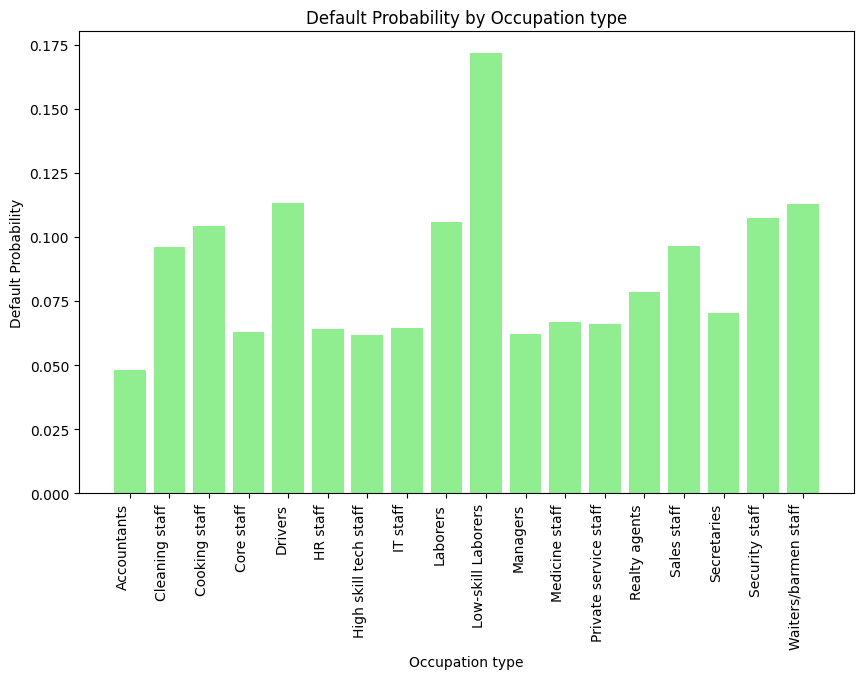

In [ ]:
# Calculate default probability for each job position
occupation_default_probabilities = train_df.groupby('OCCUPATION_TYPE')['TARGET'].mean().reset_index()

# Create a bar plot for occupation
plt.figure(figsize=(10, 6))
plt.bar(occupation_default_probabilities['OCCUPATION_TYPE'], occupation_default_probabilities['TARGET'], color='lightgreen')
plt.xlabel("Occupation type")
plt.ylabel("Default Probability")
plt.title("Default Probability by Occupation type")
plt.xticks(rotation=90, ha='right')
plt.show()

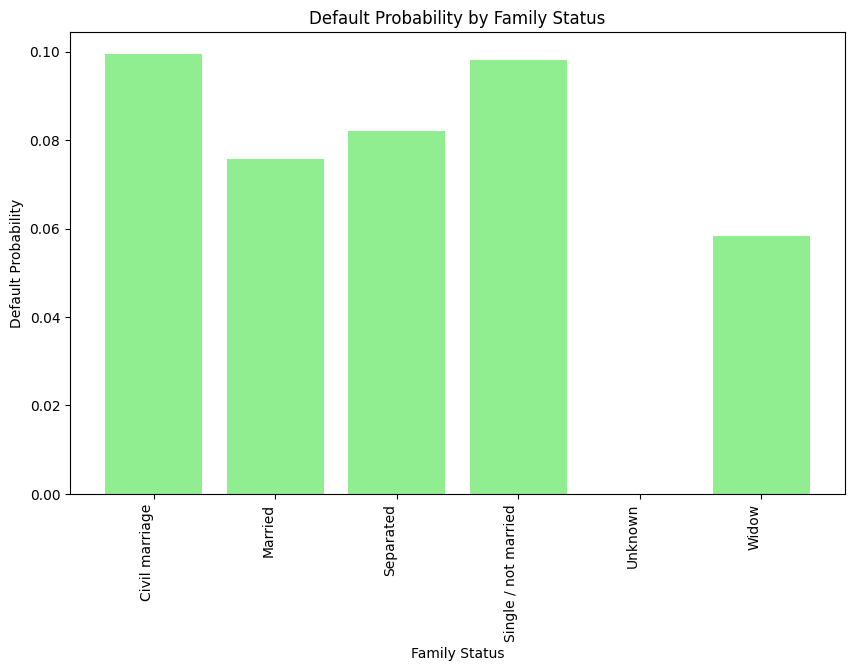

In [ ]:
# Calculate default probability for each family status
family_status_default_probabilities = train_df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().reset_index()

# Create a bar plot for family status
plt.figure(figsize=(10, 6))
plt.bar(family_status_default_probabilities['NAME_FAMILY_STATUS'], family_status_default_probabilities['TARGET'], color='lightgreen')
plt.xlabel("Family Status")
plt.ylabel("Default Probability")
plt.title("Default Probability by Family Status")
plt.xticks(rotation=90, ha='right')
plt.show()

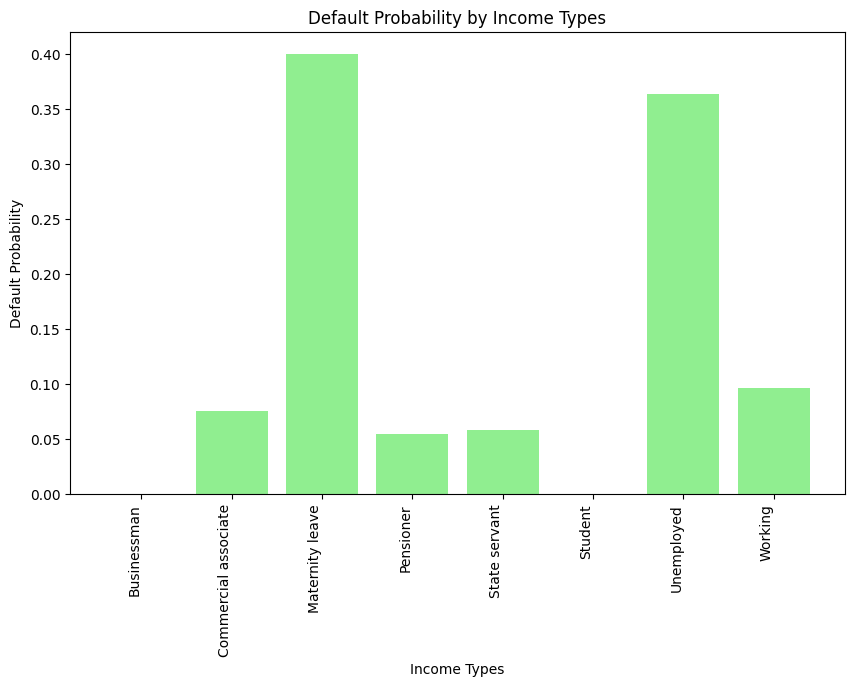

In [ ]:
# Calculate default probability for each income type
income_type_default_probabilities = train_df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().reset_index()

# Create a bar plot for income types
plt.figure(figsize=(10, 6))
plt.bar(income_type_default_probabilities['NAME_INCOME_TYPE'], income_type_default_probabilities['TARGET'], color='lightgreen')
plt.xlabel("Income Types")
plt.ylabel("Default Probability")
plt.title("Default Probability by Income Types")
plt.xticks(rotation=90, ha='right')
plt.show()

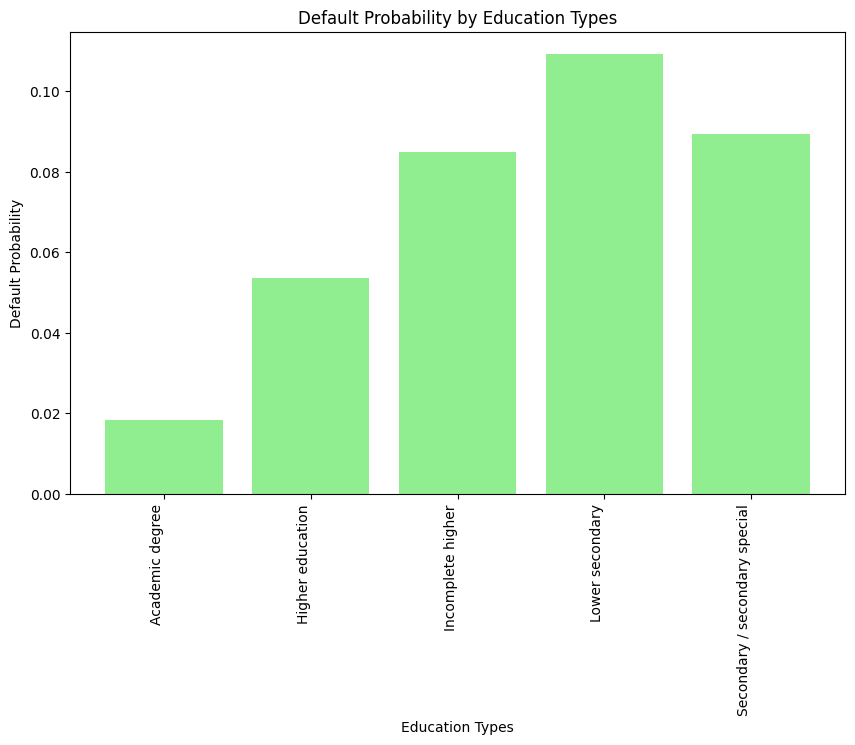

In [ ]:
# Calculate default probability for each education type
education_type_default_probabilities = train_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().reset_index()

# Create a bar plot for education types
plt.figure(figsize=(10, 6))
plt.bar(education_type_default_probabilities['NAME_EDUCATION_TYPE'], education_type_default_probabilities['TARGET'], color='lightgreen')
plt.xlabel("Education Types")
plt.ylabel("Default Probability")
plt.title("Default Probability by Education Types")
plt.xticks(rotation=90, ha='right')
plt.show()

---
## Data Preparation

In [ ]:
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Null Value Calculation**

In [ ]:
# % null value in each column
round(train_df.isnull().sum() / train_df.shape[0] * 100.00,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

- There are many columns in applicationDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

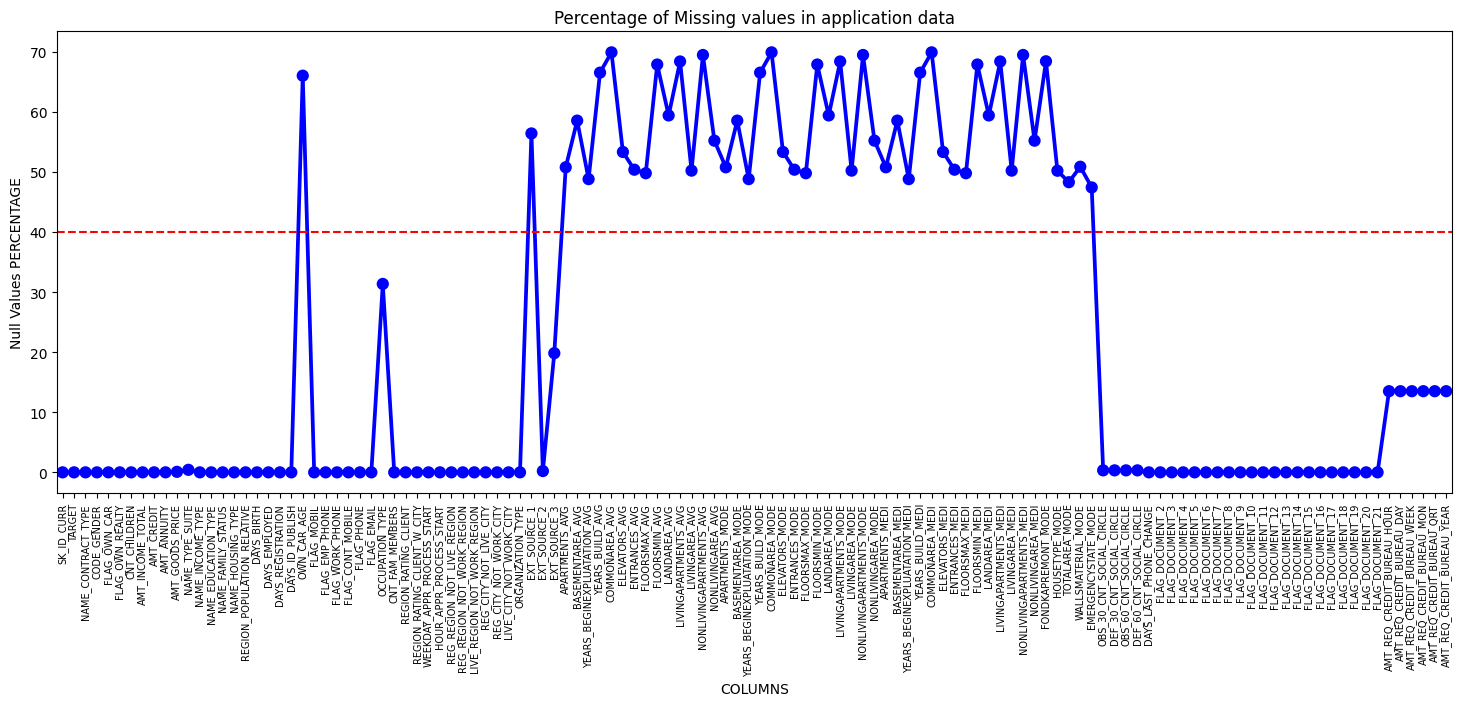

In [ ]:
null_applicationDF = pd.DataFrame((train_df.isnull().sum())*100/train_df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

- From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values


In [ ]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]

# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

- Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

---
**Analyze & Delete Unnecessary Columns in train_df**

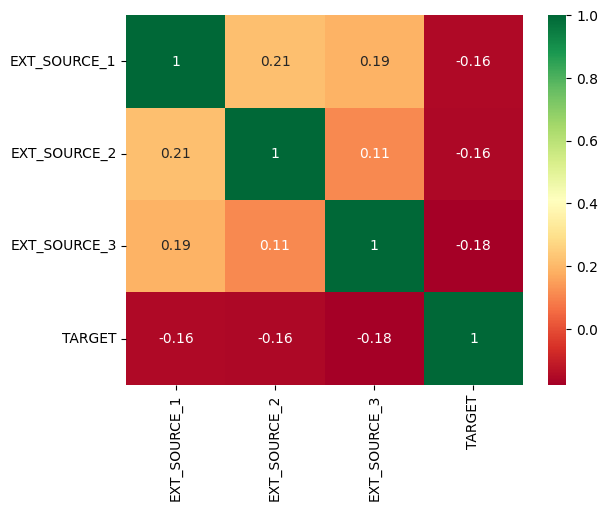

In [ ]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = train_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

- Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [ ]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3']
# as EXT_SOURCE_1 column is already included in nullcol_40_application
len(Unwanted_application)

51

<ipython-input-14-476a2dd0e195>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})


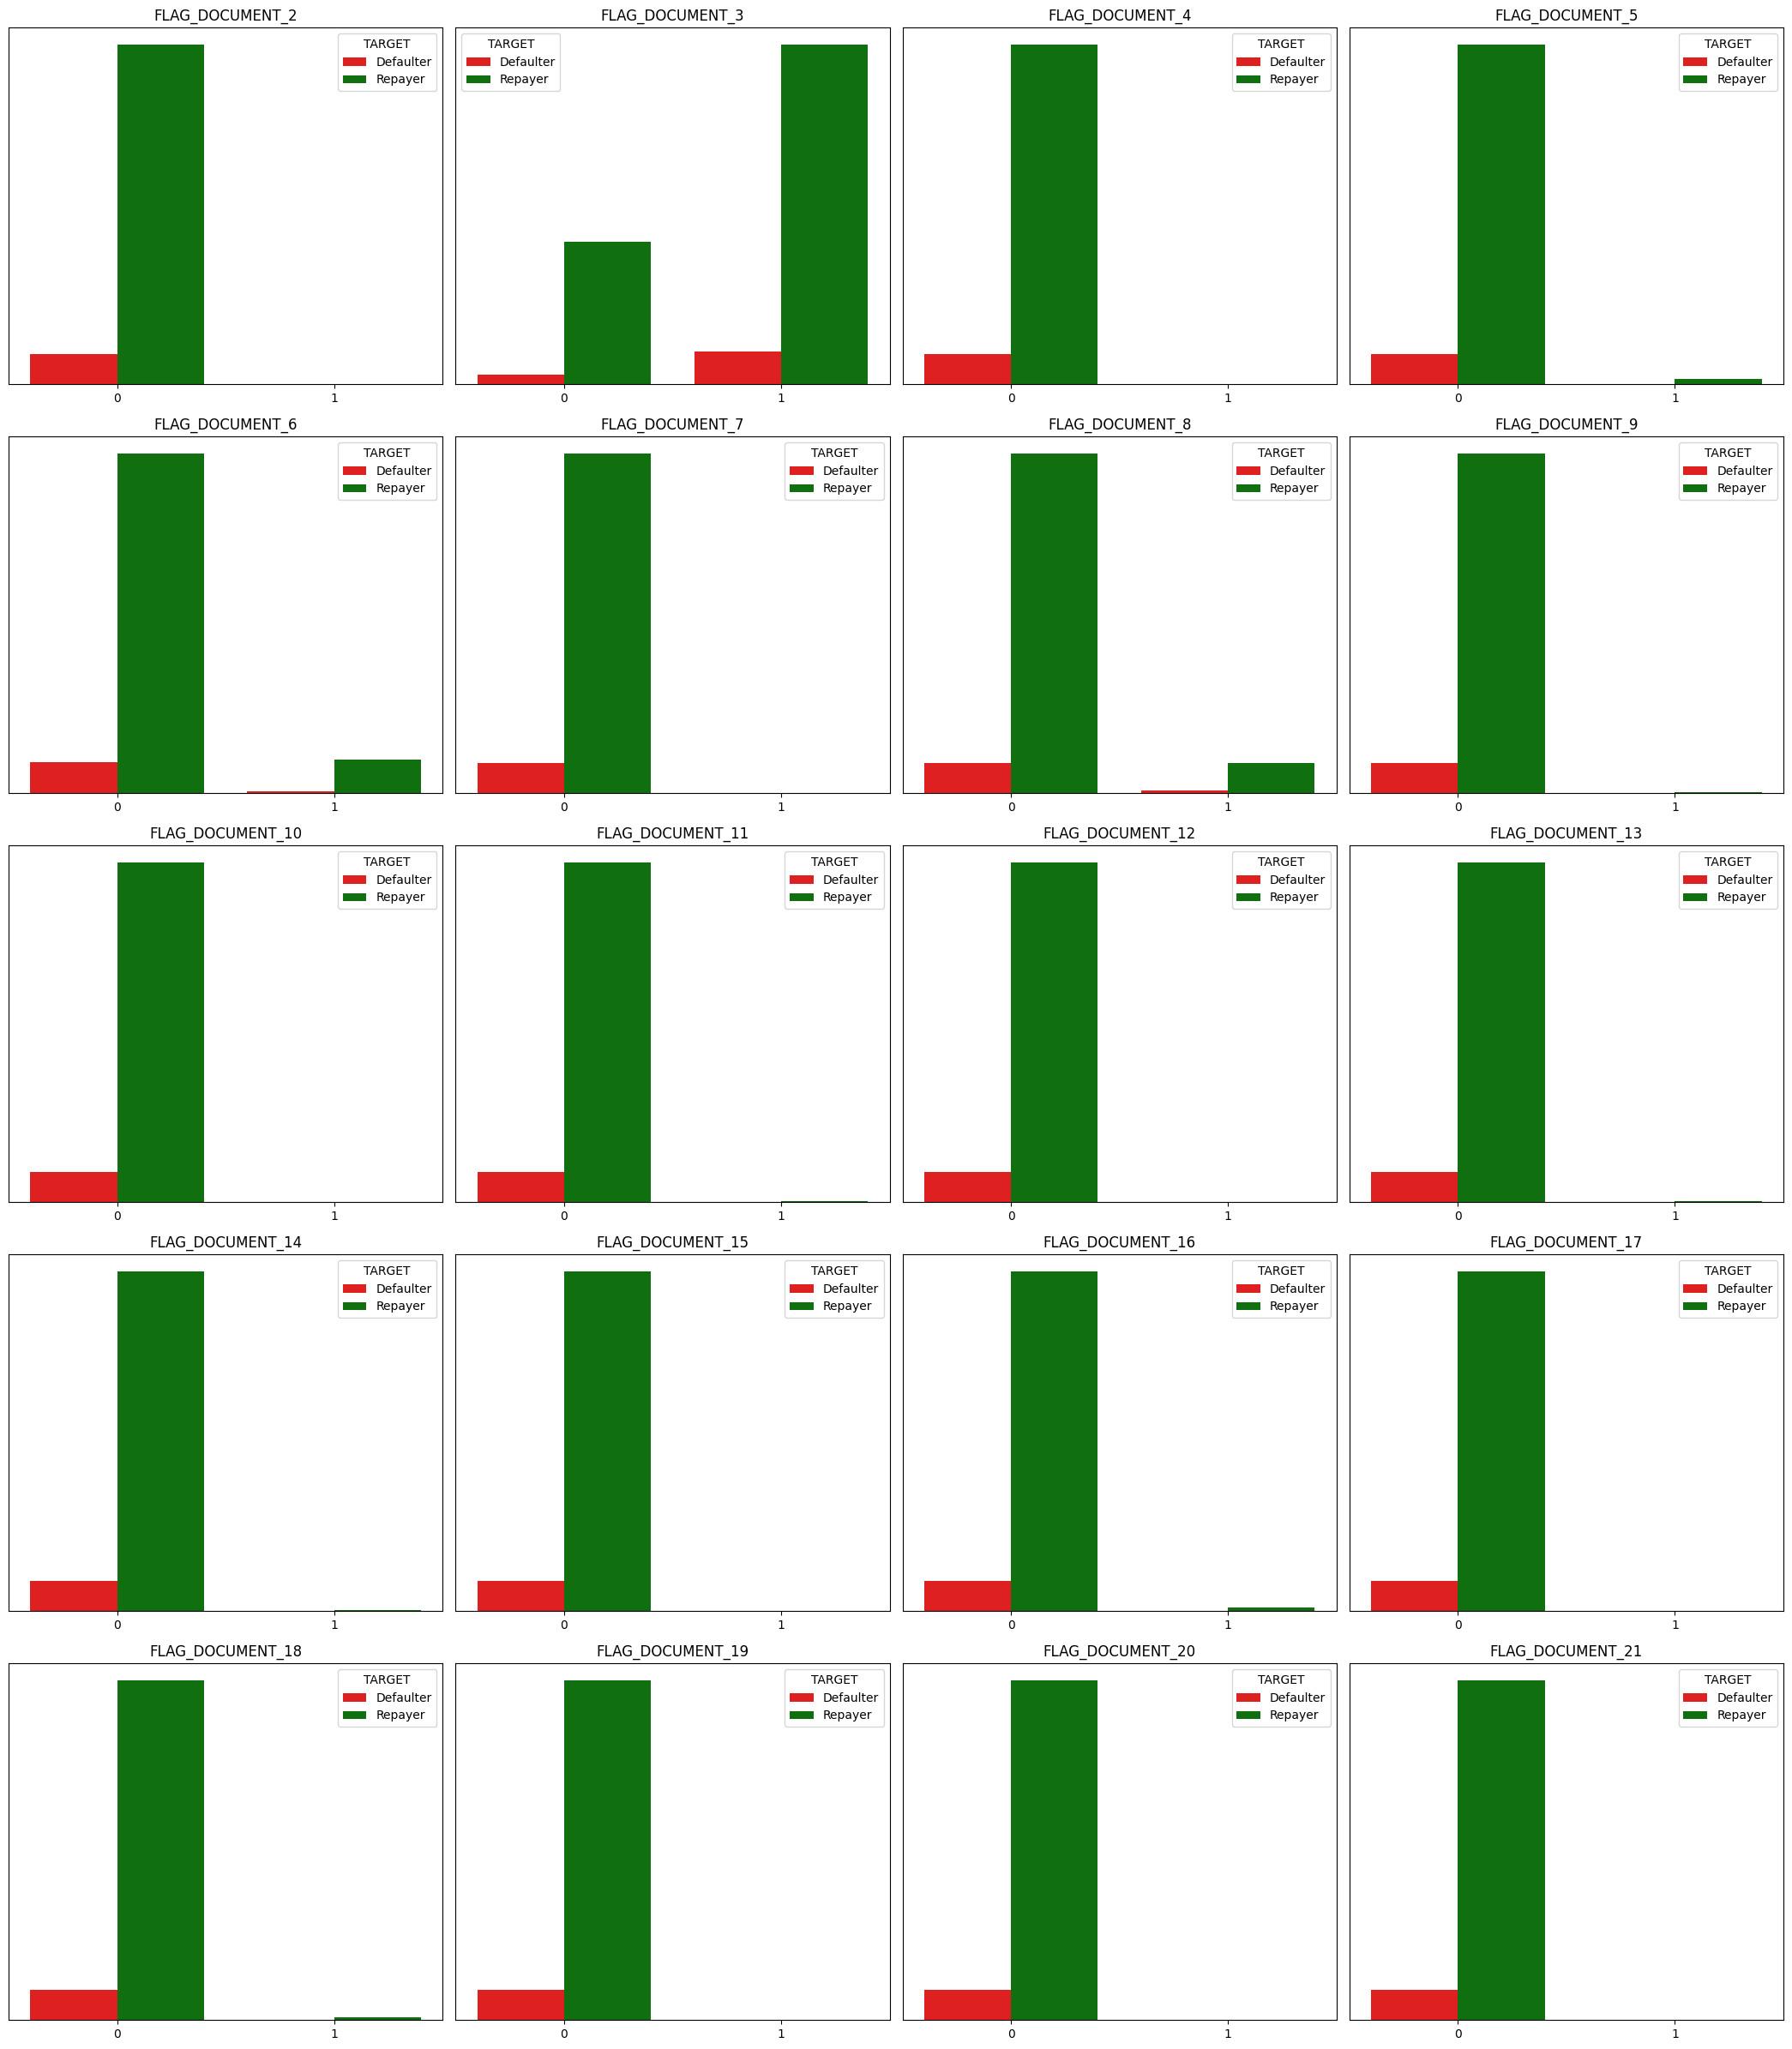

In [ ]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = train_df[col_Doc + ["TARGET"]]
length = len(col_Doc)
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(21, 24))

for i, (col, ax) in enumerate(zip(col_Doc, axes.flatten())):
    sns.countplot(x=col, hue="TARGET", data=df_flag, palette=["r", "g"], ax=ax)
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(col)

plt.tight_layout()
plt.show()

- The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [ ]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

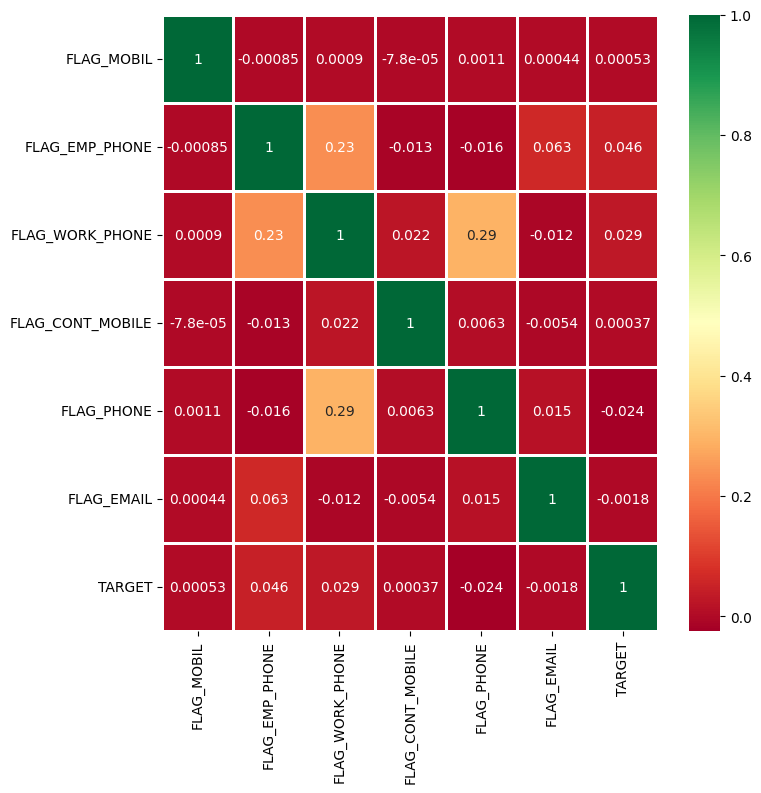

In [ ]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = train_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

- There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [ ]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

- Total 76 columns can be deleted from train_df
- After deleting unnecessary columns, there are 46 columns remaining in train_df

In [ ]:
# Dropping the unnecessary columns from applicationDF
train_df.drop(labels=Unwanted_application,axis=1,inplace=True)

In [ ]:
# inspecting the column types after removal of unnecessary columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

---

**Standardize Values**

In [ ]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    train_df[col] = abs(train_df[col])

In [ ]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
train_df['AMT_INCOME_TOTAL']=train_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

train_df['AMT_INCOME_RANGE']=pd.cut(train_df['AMT_INCOME_TOTAL'],bins,labels=slot)
train_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

- More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [ ]:
# Creating bins for Credit amount
train_df['AMT_CREDIT']=train_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

train_df['AMT_CREDIT_RANGE']=pd.cut(train_df['AMT_CREDIT'],bins=bins,labels=slots)
#checking the binning of data and % of data in each category
train_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

- More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [ ]:
# Creating bins for Age
train_df['AGE'] = train_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

train_df['AGE_GROUP']=pd.cut(train_df['AGE'],bins=bins,labels=slots)

#checking the binning of data and % of data in each category
train_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

- 31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [ ]:
# Creating bins for Employement Time
train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

train_df['EMPLOYMENT_YEAR']=pd.cut(train_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

#checking the binning of data and % of data in each category
train_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

- More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

---
**Data Type Conversion**

In [ ]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    train_df[col] =pd.Categorical(train_df[col])

In [ ]:
# inspecting the column types if the above conversion is reflected
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

---
**Null Value Data Imputation**

In [ ]:
# checking the null value % of each column in applicationDF dataframe
round(train_df.isnull().sum() / train_df.shape[0] * 100.00,3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
OCCUPATION_TYPE                31.346
CNT_FAM_MEMBERS                 0.001
REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PR

Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:

In [ ]:
train_df['NAME_TYPE_SUITE'].fillna((train_df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [ ]:
# Calculate the mean of the 'AMT_GOODS_PRICE' column
mean_value = train_df['AMT_GOODS_PRICE'].mean(skipna=True)

# Fill missing values with the calculated mean
train_df['AMT_GOODS_PRICE'].fillna(mean_value, inplace=True)

Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

In [ ]:
train_df['OCCUPATION_TYPE'] = train_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
train_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [ ]:
# Add 'Unknown' as a category to 'EMPLOYMENT_YEAR'
train_df['EMPLOYMENT_YEAR'] = pd.Categorical(train_df['EMPLOYMENT_YEAR'], categories=train_df['EMPLOYMENT_YEAR'].cat.categories.tolist() + ['Unknown'])

# Fill missing values with 'Unknown'
train_df['EMPLOYMENT_YEAR'].fillna('Unknown', inplace=True)

In [ ]:
# Check unique categories in 'AMT_INCOME_RANGE'
unique_categories = train_df['AMT_INCOME_RANGE'].cat.categories.tolist()

# Add 'Unknown' if it doesn't exist in unique categories
if 'Unknown' not in unique_categories:
    unique_categories.append('Unknown')

# Add 'Unknown' as a category to 'AMT_INCOME_RANGE'
train_df['AMT_INCOME_RANGE'] = pd.Categorical(train_df['AMT_INCOME_RANGE'], categories=unique_categories)

# Fill missing values with 'Unknown'
train_df['AMT_INCOME_RANGE'].fillna('Unknown', inplace=True)

Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [ ]:
train_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
          'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
          'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,307499.000000,307509.000000,307510.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,1.422245,0.143421,1.405292,0.100049,27108.573909,2.152665,-962.858788
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,2.400989,0.446698,2.379803,0.362291,14493.737315,0.910682,826.808487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1615.500000,1.000000,-4292.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16524.000000,2.000000,-1570.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24903.000000,2.000000,-757.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000,34596.000000,3.000000,-274.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,348.000000,34.000000,344.000000,24.000000,258025.500000,20.000000,0.000000


Impute with median as mean has decimals and this is number of requests

In [ ]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
          'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

for col in amount:
    train_df[col].fillna(train_df[col].median(),inplace = True)

In [ ]:
# checking the null value % of each column in applicationDF dataframe
round(train_df.isnull().sum() / train_df.shape[0] * 100.00,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_

In [ ]:
# List of variables to be dropped
drops = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AGE_GROUP', 'YEARS_EMPLOYED', 'AGE', 'DAYS_EMPLOYED','SK_ID_CURR']

# Remove variables with the same meaning
train_df = train_df.drop(columns=drops, errors='ignore')

---
**Dummy variables**

In [ ]:
# change non-numeric features to dummy variables
category_columns = train_df.select_dtypes(include='category').columns
train_df = pd.get_dummies(train_df, columns=category_columns)

In [ ]:
numeric_features = train_df.dtypes[train_df.dtypes != 'object'].index
numeric_features = train_df.drop('TARGET', axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_features

Index(['CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

---
**Standardization**

In [ ]:
train_df[numeric_features] = train_df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

In [ ]:
# recheck the mean and std after standardization
train_df[numeric_features].mean(), train_df[numeric_features].std()

(CNT_CHILDREN                 -3.800979e-17
 AMT_ANNUITY                  -1.173798e-17
 AMT_GOODS_PRICE               6.470329e-16
 REGION_POPULATION_RELATIVE    1.373898e-16
 DAYS_BIRTH                   -3.290331e-17
 DAYS_REGISTRATION             5.083376e-18
 DAYS_ID_PUBLISH              -6.750492e-17
 CNT_FAM_MEMBERS               2.155814e-16
 HOUR_APPR_PROCESS_START      -7.650481e-17
 REG_REGION_NOT_LIVE_REGION   -3.770941e-17
 OBS_30_CNT_SOCIAL_CIRCLE      1.305503e-17
 DEF_30_CNT_SOCIAL_CIRCLE     -5.217392e-17
 OBS_60_CNT_SOCIAL_CIRCLE     -8.419919e-17
 DEF_60_CNT_SOCIAL_CIRCLE     -5.915201e-17
 DAYS_LAST_PHONE_CHANGE       -4.866177e-17
 FLAG_DOCUMENT_3               6.086187e-17
 AMT_REQ_CREDIT_BUREAU_HOUR   -1.072130e-17
 AMT_REQ_CREDIT_BUREAU_DAY    -2.114222e-17
 AMT_REQ_CREDIT_BUREAU_WEEK    1.155313e-19
 AMT_REQ_CREDIT_BUREAU_MON     5.642547e-17
 AMT_REQ_CREDIT_BUREAU_QRT     4.306428e-17
 AMT_REQ_CREDIT_BUREAU_YEAR    8.595527e-18
 dtype: float64,
 CNT_CHILDREN  

---
## Training and Validation

In [ ]:
# Extracting features and labels
features = train_df.drop(columns=['TARGET']).values.astype(np.float32)
labels = train_df['TARGET'].values.reshape(-1, 1).astype(np.float32)


# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

train_indices, temp_indices, train_features, temp_features, train_labels, temp_labels = train_test_split(
    np.arange(len(features)),
    features_tensor,
    labels_tensor,
    test_size= 0.3,
    random_state=42
)

valid_indices, test_indices, valid_features, test_features, valid_labels, test_labels = train_test_split(
    temp_indices,
    temp_features,
    temp_labels,
    test_size=0.2,
    random_state=42
)

train_labels = train_labels.view(-1).long()
valid_labels = valid_labels.view(-1).long()
test_labels = test_labels.view(-1).long()

# Verify the shapes
print("Train features shape:", train_features.shape)
print("Valid features shape:", valid_features.shape)
print("Test features shape:", test_features.shape)

print("Train labels shape:", train_labels.shape)
print("Valid labels shape:", valid_labels.shape)
print("Test labels shape:", test_labels.shape)


Train features shape: torch.Size([215257, 195])
Valid features shape: torch.Size([73803, 195])
Test features shape: torch.Size([18451, 195])
Train labels shape: torch.Size([215257])
Valid labels shape: torch.Size([73803])
Test labels shape: torch.Size([18451])


We have 215257 train samples and 73803 valid samples.

Test data has 18451 rows.

---
## DataLoaders and Batching

In [ ]:
# create Tensor datasets
train_data = TensorDataset(train_features, train_labels)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
valid_data = TensorDataset(valid_features, valid_labels)
valid_loader = DataLoader(valid_data, batch_size=128, shuffle=False)
test_data = TensorDataset(test_features)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
features, labels = next(dataiter)

print('Sample input size: ', features.size()) # batch_size, seq_length
print('Sample input: \n', features)
print()
print('Sample label size: ', labels.size()) # batch_size
print('Sample label: \n', labels)

Sample input size:  torch.Size([128, 195])
Sample input: 
 tensor([[-0.5775,  0.6247,  1.4667,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5775, -0.0075,  0.0043,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5775,  0.6216,  0.2481,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.5775, -0.3512, -0.2394,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.8073, -0.8747, -0.9705,  ...,  0.0000,  0.0000,  1.0000],
        [-0.5775, -0.1497, -0.8487,  ...,  0.0000,  0.0000,  1.0000]])

Sample label size:  torch.Size([128])
Sample label: 
 tensor([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


---
## Define and Train the model

First, we will use GPU training if it is availabe.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Define the model with LogSoftmax() as activation function

In [ ]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0):
        super().__init__()

        # Input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])

        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])

        self.output = nn.Linear(hidden_layers[-1], output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

        self.dropout = nn.Dropout(p=drop_p)

    def forward(self, x):
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)

        x = self.output(x)
        x = self.log_softmax(x)

        return x

Train the model with NLLLoss() as loss function

In [ ]:
# Define the training function for regression tasks to calculate the train loss and validation loss
def train(model, train_loader, valid_loader, criterion = nn.NLLLoss(), num_epochs=200, learning_rate=0.00001, weight_decay=0):
    train_losses, valid_losses = [], []                     # To store training and validation losses
    # Initialize the optimizer, we use Adam here
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    valid_loss_min = float('inf')  # track change in validation loss
    for epoch in range(num_epochs):
        tot_train_loss = 0.0
        for features, labels in train_loader:           # For each batch in DataLoader
            # Move data to device (GPU or CPU)
            features = features.to(device)
            labels = labels.to(device)

            #1. Compute the output
            log_ps = model(features)
            #2.  Compute loss
            loss = criterion(log_ps, labels)
            #3. Clear the gradients from previous iteration
            optimizer.zero_grad()
            #4. Backpropagate the error, compute the new gradients
            loss.backward()
            #5. Update the weights
            optimizer.step()

            tot_train_loss += loss.item()


        else:
            #Implement the validation pass and print out the validation accuracy
            tot_valid_loss = 0.0
            accuracy = 0  # Number of correct predictions on the test set
            with torch.no_grad():
                model.eval()  # Set the model to evaluation mode
                # In evaluation (or testing) mode, we don't want any parameter updates. We want the model to give
                # the final output based on current parameter values.
                for features, labels in valid_loader:
                    # Move data to device (GPU or CPU)
                    features = features.to(device)
                    labels = labels.to(device)

                    #1. Compute the output
                    log_ps = model(features)
                    #2. Compute the loss
                    loss = criterion(log_ps, labels)
                    tot_valid_loss += loss.item()

                    # Get the class probabilities
                    ps = torch.exp(log_ps)
                    # Get the top class probabilities and the indices of those classes
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

        # Set the model back to training mode
        model.train()

        # Print out the validation loss and accuracy
        train_loss = tot_train_loss / len(train_loader)
        valid_loss  = tot_valid_loss / len(valid_loader)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print("Epoch: {}/{}.. ".format(epoch+1, num_epochs),
                  "Training Loss: {:.3f}.. ".format(train_loss),
                  "Valid Loss: {:.3f}.. ".format(valid_loss),
                  "Valid Accuracy: {:.3f}".format(accuracy / len(valid_loader)))

        # Save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f'Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
            torch.save(model.state_dict(), 'model.pth')
            valid_loss_min = valid_loss

    return  train_losses, valid_losses

In [ ]:
model = Network(input_size=train_features.shape[1], output_size=2, hidden_layers=[512, 256, 128, 64], drop_p=0.3)
model = model.to(device)
model

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=195, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
train_losses, valid_losses = train(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.0001, weight_decay=0.00001)

Epoch: 1/20..  Training Loss: 0.274..  Valid Loss: 0.268..  Valid Accuracy: 0.919
Validation loss decreased (inf --> 0.268226). Saving model...
Epoch: 2/20..  Training Loss: 0.270..  Valid Loss: 0.267..  Valid Accuracy: 0.919
Validation loss decreased (0.268226 --> 0.267001). Saving model...
Epoch: 3/20..  Training Loss: 0.268..  Valid Loss: 0.267..  Valid Accuracy: 0.919
Epoch: 4/20..  Training Loss: 0.267..  Valid Loss: 0.266..  Valid Accuracy: 0.919
Validation loss decreased (0.267001 --> 0.266363). Saving model...
Epoch: 5/20..  Training Loss: 0.267..  Valid Loss: 0.267..  Valid Accuracy: 0.919
Epoch: 6/20..  Training Loss: 0.267..  Valid Loss: 0.267..  Valid Accuracy: 0.919
Epoch: 7/20..  Training Loss: 0.266..  Valid Loss: 0.266..  Valid Accuracy: 0.919
Validation loss decreased (0.266363 --> 0.266124). Saving model...
Epoch: 8/20..  Training Loss: 0.266..  Valid Loss: 0.266..  Valid Accuracy: 0.919
Epoch: 9/20..  Training Loss: 0.266..  Valid Loss: 0.266..  Valid Accuracy: 0.919

In [ ]:
def plot_errors(train_losses, valid_losses, num_epochs=20):
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, num_epochs + 1), train_losses, label='train')
    plt.plot(range(1, num_epochs + 1), valid_losses, label='valid')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

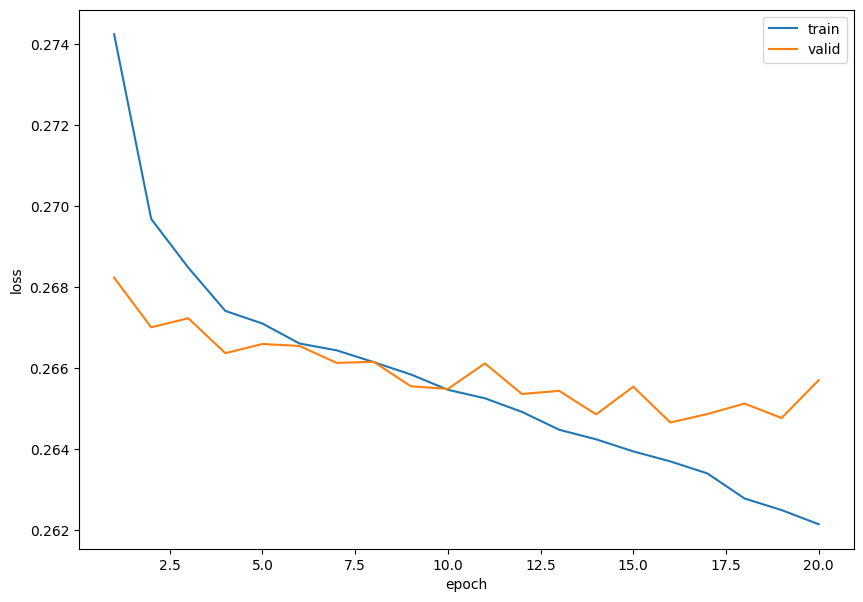

In [ ]:
plot_errors(train_losses, valid_losses)

---
## Inference on test data

In [ ]:
def test(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    pred_labels = torch.tensor([]).to(device)
    with torch.no_grad():
      for features, in test_loader:
            # Move data to device (GPU or CPU)
            features = features.to(device)
            output = model(features)  # Compute the output
            ps = torch.exp(output)
            # store prediction results
            pred_labels = torch.cat( (pred_labels,ps),dim=0)
    return  pred_labels

In [ ]:
pred_labels =test(model,test_loader)

In [ ]:
def calculate_accuracy(pred_labels, test_labels):
    # Convert predicted probabilities to class predictions (0 or 1)
    predicted_classes = torch.argmax(pred_labels, dim=1)

    # Compare with true labels
    correct_predictions = (predicted_classes == test_labels).sum().item()

    # Calculate accuracy
    total_samples = test_labels.size(0)
    accuracy = correct_predictions / total_samples

    return accuracy

In [ ]:
test_labels = test_labels.to(pred_labels.device)
accuracy = calculate_accuracy(pred_labels, test_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9224974256137879


The accuracy is 0.92